<a href="https://colab.research.google.com/github/rmorlowski/Machine-Learning/blob/master/Cats_Dogs_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning

The deliverable is to benchmark the performance and tradeoffs of different deep neural network classification models used to predict images. This will be accomplished by comparing deep and convolutional neural network models with different parameters. From these techniques, the best model will be selected by considering accuracy scores and by measuring the time it takes for implementation.

Relevant documentation includes:

*   [Agéron, handson-ml](https://github.com/ageron/handson-ml/blob/master/13_convolutional_neural_networks.ipynb)
*   [Lynda - Deep Learning: Image Recognition](https://www.lynda.com/Python-tutorials/Deep-Learning-Image-Recognition/628707-2.html)
*   [Google MLCC - cat_vs_dog](https://research.google.com/seedbank/seed/cat_vs_dog_part_one)
*   [Google MLCC - cat_vs_dog_ptII](https://research.google.com/seedbank/seed/cat_vs_dog_part__two)
*   [subsubroutine](http://www.subsubroutine.com/sub-subroutine/2016/9/30/cats-and-dogs-and-convolutional-neural-networks)



![alt text](https://i2.wp.com/freepngimages.com/wp-content/uploads/2014/04/dog_and_cat_1_2.png?w=472)

The original data consisted of 25 thousand images of cats and dogs. To ensure that the problem may be run on typical personal computers with limited memory and no graphical processing units (GPUs), we work with only two thousand images, one thousand cat images and one thousand dog images.  The original image files are provided in a zip archive:

### Section 1: Ingest - Data Survey

After the data have been prepared for analysis in a jump-start program (to be provided), we will divide the images into training, dev, and test sets for evaluating alternative neural network models per our experimental design.

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

In [0]:
import tensorflow as tf
import keras
import time
from tensorboardcolab import *
from skimage import color, io

import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
from tflearn.metrics import Accuracy

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Check for running GPU
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# Whatever the vision task (object detection, recognition, classification),
# the work begins with image processing...  

# This program shows how numpy arrays may be generated from image files
# using the Open CV library and various Python utilities.

# We generate grayscale and color representations in numpy arrays
# for use in subsequent solutions for the binary classification task.

# Program developed by Thomas W. Miller, August 7, 2018 

import os # operating system functions, shutil # high-level file operations
import os.path  # for manipulation of file path names
import numpy as np

from matplotlib import pyplot as plt  # for display of images

RANDOM_SEED = 42

In [0]:
# Open CV for image processing
# Installed on Mac with pip install opencv-python 
import cv2

Setup ngrok and run TensorBoard in Colab

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-03-04 20:44:19--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.172.177.65, 34.206.9.96, 34.231.75.48, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.172.177.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]   5.11M  7.85MB/s    in 0.7s    

2019-03-04 20:44:20 (7.85 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

**Mount zip folder to your Google Drive.**

Add the folders with the "cats" and "dogs" .jpg files to your Google 'My Drive' in a folder labeled 'cats_dogs_images'.

In [0]:
# Mount G Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Enter your authorization code:

In [0]:
import os;os.listdir("/content/gdrive/My Drive/cats_dogs_images")

['cats_dogs_images']

In [0]:
# List in bash
!ls -l /content/gdrive/My\ Drive/cats_dogs_images

total 4
drwx------ 2 root root 4096 Feb 20 01:31 cats_dogs_images


In [0]:
# get the data
cd '/content/gdrive/My Drive/cats_dogs_images/cats_dogs_images'

/content/gdrive/My Drive/cats_dogs_images/cats_dogs_images


In [0]:
pwd

'/content/gdrive/My Drive/cats_dogs_images/cats_dogs_images'

**Cats & Dogs Dataset**

In [0]:
# Original data from Kaggle (we use the first 1000 cats and 1000 dogs):
#   https://www.kaggle.com/c/dogs-vs-cats 

In [0]:
# The paths to the directories where the original raster files are located
cat_image_dir_name = \
    '/content/gdrive/My Drive/cats_dogs_images/cats_dogs_images/cats'

In [0]:
dog_image_dir_name = \
    '/content/gdrive/My Drive/cats_dogs_images/cats_dogs_images/dogs'

In [0]:
# "Human" sorting of file names facilitated by
# https://nedbatchelder.com/blog/200712/human_sorting.html
import re

def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_nicely(l):
    """ Sort the given list in the way that humans expect.
    """
    l.sort(key=alphanum_key)
    
    # Generate nicely sorted list of file names, excluding hidden files    
def directory_list (dir_name):
    start_list = os.listdir(dir_name)
    end_list = []
    for file in start_list:
        if (not file.startswith('.')):
            end_list.append(file) 
    end_list.sort(key = alphanum_key)        
    return(end_list)        

cat_file_names = directory_list(cat_image_dir_name)
dog_file_names = directory_list(dog_image_dir_name)   

### Section 2: EDA & Pre-processing

In [0]:
# Let's find out the total number of cat and dog images in the directories:
print(len(cat_file_names))
print(len(dog_file_names))

1000
1000


In [0]:
# Convert image to numpy array... 
# Three channels for color converted to grayscale
def parse_grayscale(image_file_path):
    image = cv2.imread(image_file_path, cv2.IMREAD_GRAYSCALE)
    return(image)

In [0]:
# Convert image to numpy array... three channels for color
def parse_color(image_file_path):
    image = cv2.imread(image_file_path, cv2.IMREAD_COLOR)
    # Default cv2 is BGR... need RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return(image)
  
def parse_grayscale_and_resize(image_file_path, size = (64, 64)):
    image = cv2.imread(image_file_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, size)
    return(image)

def parse_color_and_resize(image_file_path, size = (64, 64)):
    image = cv2.imread(image_file_path, cv2.IMREAD_COLOR)
    # Default cv2 is BGR... need RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, size)
    return(image)  

In [0]:
def show_grayscale_image(image):
    plt.imshow(image, cmap = 'gray') 
    plt.axis('off')
    plt.show()

In [0]:
def show_color_image(image):
    plt.imshow(image) 
    plt.axis('off')
    plt.show() 

In [0]:
# Sample commands to convert color image to grayscale and display to screen
# Note the original images are (374, 500, 3)  
# image_file_path = os.path.join(cat_image_dir_name, cat_file_names[0])        
# image = parse_grayscale(image_file_path)
# image.shape  # shows size of the numpy array    
# show_grayscale_image(image)
# And to show the original color image    
# image = parse_color(image_file_path)
# show_color_image(image)
# image.shape  # shows size of the numpy array 
# Work with resized color image using default size 64x64    
# image = parse_color_and_resize(image_file_path)
# show_color_image(image)
# image.shape  # shows size of the numpy array  
# Work with resized color image using size 128x128    
# image = parse_color_and_resize(image_file_path, size = (128, 128))
# show_color_image(image)
# image.shape  # shows size of the numpy array      
# Work with resized color image using size 256x256    
# image = parse_color_and_resize(image_file_path, size = (256, 256))
# show_color_image(image)
# image.shape  # shows size of the numpy array 

**Visualize Cute Cats & Dogs**

For both cats and dogs, we have 1,000 training images and 500 test images.

Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

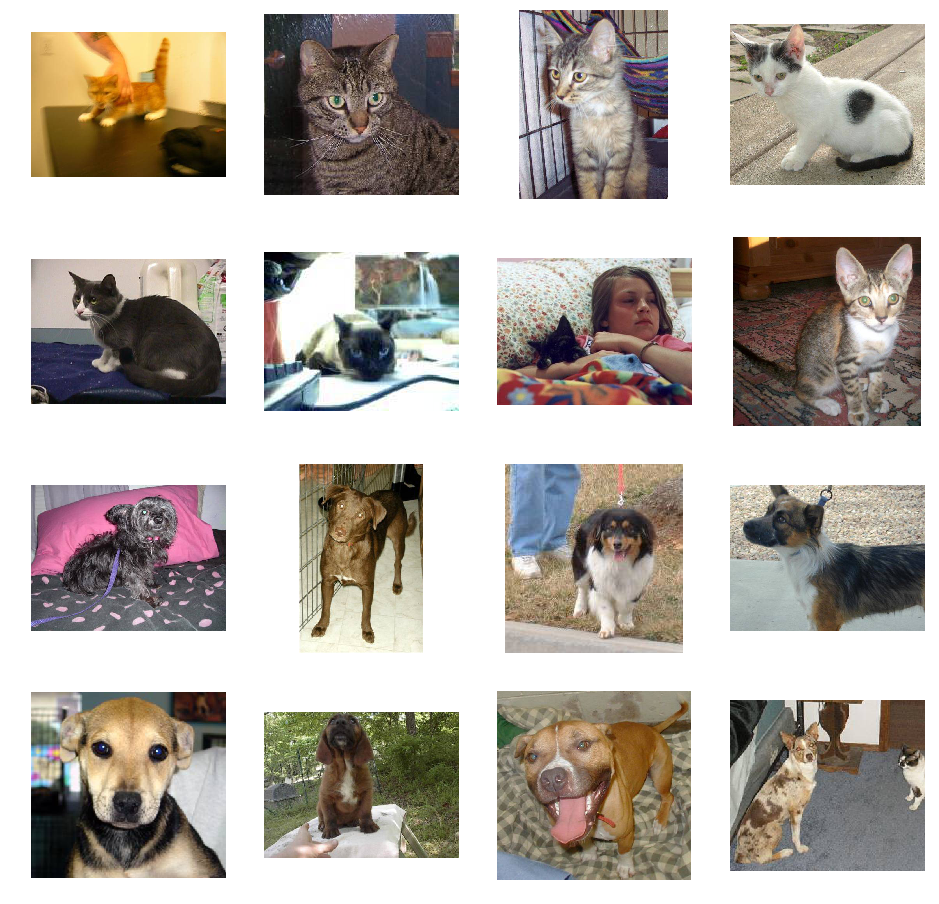

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(cat_image_dir_name, fname) 
                for fname in cat_file_names[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(dog_image_dir_name, fname) 
                for fname in dog_file_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Ruh-roh, there appears to be a picture with a dog and a cat!  Hopefully this doesn't impact our learning algorithm.

In [0]:
# ----------------------------------------------------------------------
# Examine dimensions of original raster images 
# Results show considerable variability in image pixel dimensions
cats_shapes = []
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_color(image_file_path)
    cats_shapes.append(image.shape)
print('\n\nCat image file shapes:\n')    
print(cats_shapes)    

dogs_shapes = []
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_color(image_file_path)
    dogs_shapes.append(image.shape)    
print('\n\nDog image file shapes:\n') 
print(dogs_shapes)



Cat image file shapes:

[(374, 500, 3), (280, 300, 3), (396, 312, 3), (414, 500, 3), (375, 499, 3), (144, 175, 3), (303, 400, 3), (499, 495, 3), (345, 461, 3), (425, 320, 3), (499, 489, 3), (410, 431, 3), (224, 300, 3), (315, 499, 3), (267, 320, 3), (353, 405, 3), (258, 448, 3), (375, 499, 3), (374, 500, 3), (223, 320, 3), (374, 500, 3), (499, 431, 3), (345, 500, 3), (256, 334, 3), (374, 500, 3), (500, 345, 3), (374, 500, 3), (479, 370, 3), (270, 286, 3), (375, 499, 3), (262, 349, 3), (374, 500, 3), (374, 500, 3), (375, 499, 3), (499, 375, 3), (426, 499, 3), (311, 500, 3), (337, 499, 3), (337, 350, 3), (500, 374, 3), (383, 499, 3), (499, 333, 3), (173, 237, 3), (500, 356, 3), (102, 107, 3), (370, 500, 3), (433, 400, 3), (214, 258, 3), (93, 139, 3), (129, 180, 3), (196, 299, 3), (473, 256, 3), (300, 399, 3), (457, 492, 3), (499, 500, 3), (500, 344, 3), (332, 499, 3), (291, 335, 3), (375, 499, 3), (331, 464, 3), (176, 180, 3), (226, 328, 3), (377, 500, 3), (374, 500, 3), (374, 500, 3),

In [0]:
# ----------------------------------------------------------------------
print('\nProcessing image files to 64x64 color or grayscale arrays')
# Create cats_1000_64_64_3 and numpy array for 1000 cat images in color
cats_1000_64_64_3 = np.zeros((1000, 64, 64, 3))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (64, 64))
    cats_1000_64_64_3[ifile,:,:,:] = image
       
# Create dogs_1000_64_64_3 and numpy array for 1000 dog images in color   
dogs_1000_64_64_3 = np.zeros((1000, 64, 64, 3))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (64, 64))
    dogs_1000_64_64_3[ifile,:,:,:] = image

# Create cats_1000_64_64_1 and numpy array for 1000 cat images in grayscale
cats_1000_64_64_1 = np.zeros((1000, 64, 64, 1))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (64, 64))
    cats_1000_64_64_1[ifile,:,:,0] = image
       
# Create dogs_1000_64_64_1 and numpy array for 1000 dog images in grayscale   
dogs_1000_64_64_1 = np.zeros((1000, 64, 64, 1))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (64, 64))
    dogs_1000_64_64_1[ifile,:,:,0] = image


Processing image files to 64x64 color or grayscale arrays


In [0]:
# ------------------------------------------------------------------------
print('\nProcessing image files to 128x128 color or grayscale arrays')
# Create cats_1000_128_128_3 and numpy array for 1000 cat images in color
cats_1000_128_128_3 = np.zeros((1000, 128, 128, 3))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (128, 128))
    cats_1000_128_128_3[ifile,:,:,:] = image
       
# Create dogs_1000_128_128_3 and numpy array for 1000 dog images in color   
dogs_1000_128_128_3 = np.zeros((1000, 128, 128, 3))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (128, 128))
    dogs_1000_128_128_3[ifile,:,:,:] = image

# Create cats_1000_128_128_1 and numpy array for 1000 cat images in grayscale
cats_1000_128_128_1 = np.zeros((1000, 128, 128, 1))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (128, 128))
    cats_1000_128_128_1[ifile,:,:,0] = image
       
# Create dogs_1000_128_128_1 and numpy array for 1000 dog images in grayscale   
dogs_1000_128_128_1 = np.zeros((1000, 128, 128, 1))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (128, 128))
    dogs_1000_128_128_1[ifile,:,:,0] = image 


Processing image files to 128x128 color or grayscale arrays


In [0]:
# Documentation on npy binary format for saving numpy arrays for later use
#     https://towardsdatascience.com/
#             why-you-should-start-using-npy-file-more-often-df2a13cc0161 
    
# The directory where we store the numpy array objects
# store our smaller dataset
#outdir = '/Users/poweruser/Desktop/cats_dogs_work/cats_dogs_arrays'
#os.mkdir(outdir)    

In [0]:
from matplotlib import pyplot as plt  # for display of images
def show_grayscale_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

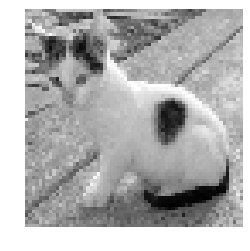

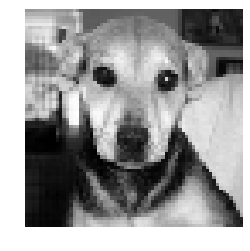

In [0]:
# Examine first cat and first dog grayscale images
show_grayscale_image(cats_1000_64_64_1[3,:,:,0])
show_grayscale_image(dogs_1000_64_64_1[4,:,:,0])

In [0]:
# Work the data for cats and dogs numpy arrays 
# These numpy arrays were generated in previous data prep work
# Stack the numpy arrays for the inputs
X_cat_dog = np.concatenate((cats_1000_64_64_1, dogs_1000_64_64_1), axis = 0) 
X_cat_dog = X_cat_dog.reshape(-1,64*64) # note coversion to 4096 inputs

#### Scale Data

In [0]:
# Scikit Learn for min-max scaling of the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit([[0.], [255.]])
X_cat_dog_min_max = scaler.transform(X_cat_dog)

In [0]:
# Define the labels to be used 1000 cats = 0 1000 dogs = 1
y_cat_dog = np.concatenate((np.zeros((1000), dtype = np.int32), 
                      np.ones((1000), dtype = np.int32)), axis = 0)

**Train Test Split**

We will again use a simple training-and-test regimen, perhaps with a three-way partitioning of the data into training, dev, and test sets.

In [0]:
# Scikit Learn for random splitting of the data  
from sklearn.model_selection import train_test_split

# Random splitting of the data in to training (80%) and test (20%)  
X_train, X_test, y_train, y_test = \
    train_test_split(X_cat_dog_min_max, y_cat_dog, test_size=0.20, 
                     random_state = RANDOM_SEED)

# encode the target variables
#y_train = keras.utils.to_categorical(y_train, 2)
#y_test = keras.utils.to_categorical(y_test, 2)

In [0]:
#test split 'train'
X_train.shape

(1600, 4096)

In [0]:
#test split 'test'
X_test.shape

(400, 4096)

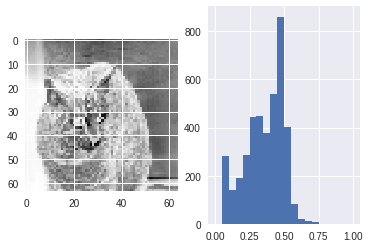

In [0]:
# Plot the image and histogram to check that we 
# haven't mangled the data.
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(64, 64), cmap=plt.cm.Greys);
ax2.hist(X_train[0], bins=20, range=[0, 1]);

We've retained the correct image data while properly rescaling to the range [0, 1].

End preprocessing.

### Section 3: Modeling



We will employ at least a 2x2 completely crossed experimental design. The factors in the design may include numbers of layers and/or nodes within layers, types of layers (convolutional or pooling), and/or other hypeparameters. We will utilize convolutional neural networks within Python TensorFlow.

*If training crashes because of an out-of-memory error, you can try reducing the mini-batch size. Alternatively, you can try reducing dimensionality using a stride, or removing a few layers. Or you can try using 16-bit floats instead of 32-bit floats.*

**DNN Model - 2 Layers**

Begin by setting the deep neural network hyperparameters, the number of layers, and the number of neurons per layer.

In [0]:
# To make output stable across runs
def reset_graph(seed= RANDOM_SEED):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [0]:
#CatsDogs#
height = 64
width = 64 

In [0]:
# 300 and 100 nodes for layers 1 and 2 as used with MNIST from Geron
n_hidden1 = 300
n_hidden2 = 100

channels = 1  # When working with color images use channels = 3

n_inputs = height * width

#CatsDogs# Has two output values # MNIST had ten digits n_outputs = 10  
n_outputs = 2  # binary classification for Cats and Dogs, 1 output node 0/1

reset_graph()

In [0]:
# dnn... Deep neural network model from Geron Chapter 10
# Note that this model makes no use of the fact that we have
# pixel data arranged in rows and columns
# So a 64x64 matrix of raster values becomes a vector of 4096 input variables
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [0]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))    

init = tf.global_variables_initializer()
saver = tf.train.Saver()

**Train DNN Model - 50 Epochs**

In [0]:
%%time

init = tf.global_variables_initializer()    

n_epochs = 50
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(y_train.shape[0] // batch_size):
            X_batch = X_train[iteration*batch_size:(iteration + 1)*batch_size,:]
            y_batch = y_train[iteration*batch_size:(iteration + 1)*batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./model_1")

0 Train accuracy: 0.55 Test accuracy: 0.55
1 Train accuracy: 0.61 Test accuracy: 0.5825
2 Train accuracy: 0.62 Test accuracy: 0.595
3 Train accuracy: 0.66 Test accuracy: 0.59
4 Train accuracy: 0.63 Test accuracy: 0.6025
5 Train accuracy: 0.62 Test accuracy: 0.595
6 Train accuracy: 0.67 Test accuracy: 0.6
7 Train accuracy: 0.66 Test accuracy: 0.61
8 Train accuracy: 0.68 Test accuracy: 0.6075
9 Train accuracy: 0.69 Test accuracy: 0.605
10 Train accuracy: 0.69 Test accuracy: 0.605
11 Train accuracy: 0.7 Test accuracy: 0.6075
12 Train accuracy: 0.7 Test accuracy: 0.615
13 Train accuracy: 0.7 Test accuracy: 0.6125
14 Train accuracy: 0.7 Test accuracy: 0.61
15 Train accuracy: 0.71 Test accuracy: 0.61
16 Train accuracy: 0.72 Test accuracy: 0.5975
17 Train accuracy: 0.69 Test accuracy: 0.6075
18 Train accuracy: 0.73 Test accuracy: 0.6025
19 Train accuracy: 0.71 Test accuracy: 0.61
20 Train accuracy: 0.69 Test accuracy: 0.6175
21 Train accuracy: 0.72 Test accuracy: 0.6025
22 Train accuracy: 0.7

#### DNN Classifier - 75 Epochs

Let's try a DNN model with 5 Layers over 75 Epochs.

In [0]:
# DNN 5 Layer Model
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    hidden3 = neuron_layer(hidden2, n_hidden2, name="hidden3",
                           activation=tf.nn.relu)
    hidden4 = neuron_layer(hidden3, n_hidden2, name="hidden4",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden4, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))    

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [0]:
%%time

init = tf.global_variables_initializer()    

n_epochs = 75
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(y_train.shape[0] // batch_size):
            X_batch = X_train[iteration*batch_size:(iteration + 1)*batch_size,:]
            y_batch = y_train[iteration*batch_size:(iteration + 1)*batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./model_2")

0 Train accuracy: 0.57 Test accuracy: 0.5325
1 Train accuracy: 0.57 Test accuracy: 0.545
2 Train accuracy: 0.59 Test accuracy: 0.555
3 Train accuracy: 0.64 Test accuracy: 0.56
4 Train accuracy: 0.64 Test accuracy: 0.54
5 Train accuracy: 0.65 Test accuracy: 0.5525
6 Train accuracy: 0.63 Test accuracy: 0.5725
7 Train accuracy: 0.68 Test accuracy: 0.56
8 Train accuracy: 0.7 Test accuracy: 0.5575
9 Train accuracy: 0.7 Test accuracy: 0.5675
10 Train accuracy: 0.72 Test accuracy: 0.57
11 Train accuracy: 0.73 Test accuracy: 0.595
12 Train accuracy: 0.76 Test accuracy: 0.5775
13 Train accuracy: 0.75 Test accuracy: 0.5725
14 Train accuracy: 0.75 Test accuracy: 0.5975
15 Train accuracy: 0.8 Test accuracy: 0.5625
16 Train accuracy: 0.78 Test accuracy: 0.605
17 Train accuracy: 0.7 Test accuracy: 0.6
18 Train accuracy: 0.75 Test accuracy: 0.6025
19 Train accuracy: 0.73 Test accuracy: 0.61
20 Train accuracy: 0.85 Test accuracy: 0.5925
21 Train accuracy: 0.8 Test accuracy: 0.5925
22 Train accuracy: 0

### Convolution Neural Networks



Regarding memory issues. With the large number of parameters being fit in deep learning tasks, out-of-memory errors may be encountered on personal computers. Géron (2017, page 363) provides these suggestions with regard to CNNs:

*If training crashes because of an out-of-memory error, you can try reducing the mini-batch size. Alternatively, you can try reducing dimensionality using a stride, or removing a few layers. Or you can try using 16-bit floats instead of 32-bit floats.*

Prepare color image data for model 3.

In [0]:
X_cat_dog_m3 = np.concatenate((cats_1000_64_64_3, dogs_1000_64_64_3), axis = 0) 
#X_cat_dog = X_cat_dog.reshape(-1,width*height) # note coversion to 16384 (128x128) inputs
#Define the labels to be used 1000 cats = 0 1000 dogs = 1
y_cat_dog_m3 = np.concatenate((np.zeros((1000), dtype = np.int32), 
                      np.ones((1000), dtype = np.int32)), axis = 0)
X_cat_dog_m3.shape #check data shape

(2000, 64, 64, 3)

In [0]:
# test-train split   
X_m3, X_test_m3, Y_m3, Y_test_m3 = train_test_split(X_cat_dog_m3, y_cat_dog_m3, test_size=0.2, random_state=42)

# encode the Ys
Y_m3 = keras.utils.to_categorical(Y_m3, 2)
Y_test_m3 = keras.utils.to_categorical(Y_test_m3, 2)

In [0]:
X_m3.shape

(1600, 64, 64, 3)

In [0]:

Y_m3.shape

(1600, 2)

#### CNN Model - 100 Epochs

Code inspired by Source: https://research.google.com/seedbank/seed/cat_vs_dog_part__two

& Source: http://www.subsubroutine.com/sub-subroutine/2016/9/30/cats-and-dogs-and-convolutional-neural-networks

In [0]:
reset_graph()

#set height & width
height = 64
width = 64
channels = 3

###################################
# Image transformations
###################################

# normalisation of images
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# Create extra synthetic training data by flipping & rotating images
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)

In [0]:
###################################
# Define network architecture
###################################

# Our input feature map is 64x64x3: 64x64 for the image pixels, and 3 for
# the three color channels: R, G, and B
network = input_data(shape=[None, 64, 64, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug)

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
conv_1 = conv_2d(network, 16, 3, activation='relu', name='conv_1')
network = max_pool_2d(conv_1, 2)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
conv_2 = conv_2d(network, 32, 3, activation='relu', name='conv_2')
network = max_pool_2d(conv_2, 2)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
conv_3 = conv_2d(network, 64, 3, activation='relu', name='conv_3')
network = max_pool_2d(conv_3, 2)

# Create a fully connected layer with ReLU activation and 512 hidden units
network = fully_connected(network, 512, activation='relu')

# Add a dropout rate of 0.5
network = dropout(network, 0.5)

# Create a fully-connected layer with two outputs
network = fully_connected(network, 2, activation='softmax')

# Configure how the network will be trained
acc = Accuracy(name="Accuracy")
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.0005, metric=acc)

# Wrap the network in a model object
model = tflearn.DNN(network, checkpoint_path='model_3.tflearn', max_checkpoints = 3,
                    tensorboard_verbose = 3, tensorboard_dir='LOG_DIR')

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


#### Train CNN

In [0]:
%%time
###################################
# Train model for 100 epochs
###################################
model.fit(X_m3, Y_m3, validation_set=(X_test_m3, Y_test_m3), batch_size=500,
      n_epoch=100, run_id='model_3', show_metric=True)

model.save('model_3.tflearn')

Training Step: 399  | total loss: 0.34586 | time: 5.727s
| Adam | epoch: 100 | loss: 0.34586 - Accuracy: 0.8574 -- iter: 1500/1600
Training Step: 400  | total loss: 0.34391 | time: 7.526s
| Adam | epoch: 100 | loss: 0.34391 - Accuracy: 0.8556 | val_loss: 0.49488 - val_acc: 0.7850 -- iter: 1600/1600
--
CPU times: user 22min 49s, sys: 10.7 s, total: 23min
Wall time: 14min 7s


**Evaluate Results**

In [0]:
#tbc=TensorBoardColab()

#### Clean Up

Run the following cell to terminate the kernel and free memory resources:

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

### Section 4:  Conclusion

**Management problem: ** Assume that we are providing advice to a website provider who is looking for tools to automatically label images provided by end users. As we look across the factors in the study, making recommendations to management about image classification, we are most concerned about achieving the highest possible accuracy in image classification. That is, we should be willing to sacrifice training time for model accuracy. What type of machine learning model works best? If it is a Convolutional Neural Network, what type of network should we use? Part of this recommendation may concern information about the initial images themselves (input data for the classification task). What types of images work best?

>**Summary Table of Models:**


>Model Type | Number of Layers | Number of Epochs | Processing Time | Train Accuracy | Test Accuracy
>--- | ---
>DNN| 2 | 50 | 24.9 s | 0.840 | 0.595
>DNN| 5 | 75 | 37.6 s| 0.900| 0.630
>CNN| 5 | 100 | 23min 26s | 0.849 | 0.790

**In Conclusion:**

After fitting a number of deep neural networks, processing time and performance was compared across experimental treatments.

The results showed:

*    The convolution neural network classification model with 5 hidden layers and 100 epochs resulted in the most accurate predictions for cats and dogs.
*    The color images with more pixel data seemed to work best for distinguishing cats and dogs post augmentation.
*    As the number of hidden layers and model complexity increased, the processing time was much slower.
*    Adding a dropout layer helped address overfitting from the deep neural network models.

The final recommendation to the website provider is to implement the convolution neural network classification model.  Although this model takes significantly longer to process, it results in the most accurate predictions and is the most trustworthy.